In [1]:
#Library import
import numpy as np
import pandas as pd
import kaggle.cli
import tensorflow as tf
from zipfile import ZipFile
import sys
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from keras.layers import Input, Dense
from keras.models import Model
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import RMSprop

from sklearn import preprocessing
from pathlib import Path
from zipfile import ZipFile
from IPython.display import display, HTML


In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()

Num GPUs Available:  1


True

In [30]:
data_A = pd.read_csv('C:/Users/Gabriel/Downloads/vehicles.csv') # file name
print(data_A.shape)
print(data_A.count())


(426880, 26)
id              426880
url             426880
region          426880
region_url      426880
price           426880
year            425675
manufacturer    409234
model           421603
condition       252776
cylinders       249202
fuel            423867
odometer        422480
title_status    418638
transmission    424324
VIN             265838
drive           296313
size            120519
type            334022
paint_color     296677
image_url       426812
description     426810
county               0
state           426880
lat             420331
long            420331
posting_date    426812
dtype: int64


In [7]:
drop = {'id', 'url', 'cylinders','region_url', 'image_url', 'county', 'posting_date', 'description', 'title_status','VIN','lat','long'}

for field in drop:
    if field in data_A.columns:
        data_A = data_A.drop(field,1)

data_A = data_A.dropna()

print(data_A.isnull().sum()) # see what is missing from data
print(data_A.count())

data_A.info()


C:\Users\Gabriel\AppData\Local\Temp/ipykernel_25516/3755468815.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_A = data_A.drop(field,1)


region          0
price           0
year            0
manufacturer    0
model           0
condition       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64
region          80961
price           80961
year            80961
manufacturer    80961
model           80961
condition       80961
fuel            80961
odometer        80961
transmission    80961
drive           80961
size            80961
type            80961
paint_color     80961
state           80961
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80961 entries, 31 to 426836
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        80961 non-null  object 
 1   price         80961 non-null  int64  
 2   year          80961 non-null  float64
 3   manufacturer  80961 non-null  object 
 4   model         80961 non-null  object 
 5

In [19]:
catgFeatures = ['region', 'manufacturer', 'model', 'condition', 
                 'fuel', 'odometer', 'transmission', 
                'drive', 'size', 'type', 'paint_color', 'state']

#Categorical variable encoding
for feature in catgFeatures:
    featureData = data_A[feature]
    featuresEncoded = LabelEncoder().fit_transform(featureData)
    data_A[feature] = featuresEncoded
    


In [20]:

X = data_A.values
y = data_A['price'].values.reshape(-1,1)


scaler_x = MinMaxScaler()
print(scaler_x.fit(X))
scaler_y = MinMaxScaler()
print(scaler_y.fit(y))
x1scale=scaler_x.transform(X)
y1scale=scaler_y.transform(y)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [36]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)




In [25]:
model = Sequential()
#data_A input dimension = 14
model.add(Dense(12, input_dim=14, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                180       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 293
Trainable params: 293
Non-trainable params: 0
_________________________________________________________________


In [28]:
rms = keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(optimizer=rms, loss='mse',  metrics=['mse','mae'])

In [29]:
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/150
972/972 [==============================] - 5s 3ms/step - loss: 6.1128e-05 - mse: 6.1128e-05 - mae: 0.0025 - val_loss: 6.5724e-08 - val_mse: 6.5724e-08 - val_mae: 1.5689e-04
Epoch 2/150
972/972 [==============================] - 3s 3ms/step - loss: 2.2580e-05 - mse: 2.2580e-05 - mae: 2.1701e-04 - val_loss: 3.7975e-08 - val_mse: 3.7975e-08 - val_mae: 1.7576e-04
Epoch 3/150
972/972 [==============================] - 3s 3ms/step - loss: 2.2552e-05 - mse: 2.2552e-05 - mae: 1.9680e-04 - val_loss: 3.2036e-08 - val_mse: 3.2036e-08 - val_mae: 1.7239e-04
Epoch 4/150
972/972 [==============================] - 3s 3ms/step - loss: 2.2547e-05 - mse: 2.2547e-05 - mae: 1.8409e-04 - val_loss: 3.1059e-08 - val_mse: 3.1059e-08 - val_mae: 1.7390e-04
Epoch 5/150
972/972 [==============================] - 3s 3ms/step - loss: 2.2536e-05 - mse: 2.2536e-05 - mae: 1.7242e-04 - val_loss: 3.4191e-08 - val_mse: 3.4191e-08 - val_mae: 1.8170e-04
Epoch 6/150
972/972 [==============================] - 3s 3

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


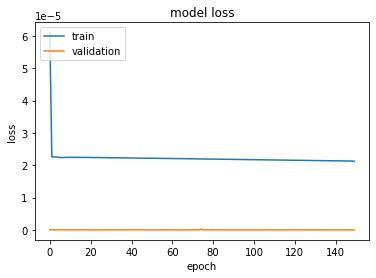

In [31]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [32]:
rms = keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=rms, loss='mse',  metrics=['mse','mae'])

In [33]:
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/150
972/972 [==============================] - 3s 3ms/step - loss: 2.1611e-05 - mse: 2.1611e-05 - mae: 4.8507e-04 - val_loss: 2.4941e-07 - val_mse: 2.4941e-07 - val_mae: 4.9939e-04
Epoch 2/150
972/972 [==============================] - 3s 3ms/step - loss: 2.1470e-05 - mse: 2.1470e-05 - mae: 4.9159e-04 - val_loss: 2.5173e-07 - val_mse: 2.5173e-07 - val_mae: 5.0170e-04
Epoch 3/150
972/972 [==============================] - 3s 3ms/step - loss: 2.1325e-05 - mse: 2.1325e-05 - mae: 4.7475e-04 - val_loss: 2.4612e-07 - val_mse: 2.4612e-07 - val_mae: 4.9608e-04
Epoch 4/150
972/972 [==============================] - 3s 3ms/step - loss: 2.1319e-05 - mse: 2.1319e-05 - mae: 4.9437e-04 - val_loss: 2.5608e-07 - val_mse: 2.5608e-07 - val_mae: 5.0602e-04
Epoch 5/150
972/972 [==============================] - 3s 3ms/step - loss: 2.1176e-05 - mse: 2.1176e-05 - mae: 4.9028e-04 - val_loss: 6.3523e-07 - val_mse: 6.3523e-07 - val_mae: 7.9700e-04
Epoch 6/150
972/972 [==============================] - 

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


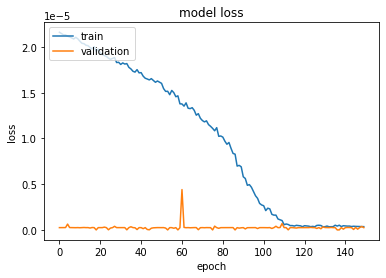

In [34]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [39]:
model2 = Sequential()
#data_A input dimension = 14
model2.add(Dense(12, input_dim=14, kernel_initializer='normal', activation='sigmoid'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='linear'))
model2.summary()

history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                180       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 293
Trainable params: 293
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150


InvalidArgumentError: Graph execution error:

Detected at node 'sequential/dense/MatMul' defined at (most recent call last):
    File "C:\Users\Gabriel\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Gabriel\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Gabriel\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\Gabriel\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Gabriel\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\Gabriel\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Gabriel\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\Gabriel\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\Gabriel\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Gabriel\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\Gabriel\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\Gabriel\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\Gabriel\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\Gabriel\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Gabriel\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\Gabriel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\Gabriel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\Gabriel\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Gabriel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Gabriel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\Gabriel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Gabriel\AppData\Local\Temp/ipykernel_25516/2803122240.py", line 8, in <module>
      history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)
    File "C:\Users\Gabriel\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Gabriel\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Gabriel\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\Gabriel\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Gabriel\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Gabriel\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\Gabriel\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Gabriel\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Gabriel\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Gabriel\AppData\Roaming\Python\Python39\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Gabriel\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Gabriel\AppData\Roaming\Python\Python39\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Users\Gabriel\AppData\Roaming\Python\Python39\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "C:\Users\Gabriel\AppData\Roaming\Python\Python39\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Gabriel\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Gabriel\AppData\Roaming\Python\Python39\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Gabriel\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Gabriel\AppData\Roaming\Python\Python39\site-packages\keras\layers\core\dense.py", line 221, in call
      outputs = tf.matmul(a=inputs, b=self.kernel)
Node: 'sequential/dense/MatMul'
Matrix size-incompatible: In[0]: [50,3], In[1]: [14,12]
	 [[{{node sequential/dense/MatMul}}]] [Op:__inference_train_function_1830287]

In [38]:
history = model2.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.